# **Student Identification :**

Fatemeh Mosaiyebzade (NUSP: 10120239)

Name of the course:  (MAC049-MAC5865) - 2021

Professor: Roberto Hirata

Institute of Mathematics and Statistics - IME

University of São Paulo - USP

# **Dataset Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Dataset Column Description:**

1- age

2- sex (1 = male; 0 = female)

3 - cp (chest pain type (4 values))

4- trestbps (resting blood pressure)

5- chol (serum cholestoral in mg/dl)

6- fbs (fasting blood sugar > 120 mg/dl)
			thal	target
7- restecg (resting electrocardiographic results (values 0,1,2))

8- 	thalach (maximum heart rate achieved)

9- 	exang (exercise induced angina)

10- oldpeak  (ST depression induced by exercise relative to rest)

11- slope (the slope of the peak exercise ST segment)

12- ca (number of major vessels (0-3) colored by flourosopy)

13- thal (3 = normal; 6 = fixed defect; 7 = reversable defect)

14- target ( 1 = Heart Disease, 0 = No Heart Disease)

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci

# **Questions to the dataset**

# **Exploratory Data Analysis (EDA) Strategy**

- Importing the data


- Dealing with Null and duplicate values

- Data Types

-  Using two methods for correlation calculation

- Asking some questions

- Data visualization

- Hierarchical Clustering

- Supervised Learning




# **Importing the data**
First of all, we start by importing the data from GitHub repository into pandas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fatemehm/Prova-MAC-5865/main/heart.csv', low_memory=False)

print('There are now {:,} rows '.format(df.shape[0]) + 'and {} columns left in our data'.format(df.shape[1]))

There are now 303 rows and 14 columns left in our data


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Dealing with NaNs and Duplicates**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**There isn't any null values in the dataset.**

In [ ]:
# We check whether there are any duplicates in our data
df.duplicated().sum()

1

In [ ]:
# We drop all duplicates from our data
df.drop_duplicates(inplace=True)

# **Data Types**

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Distributions**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


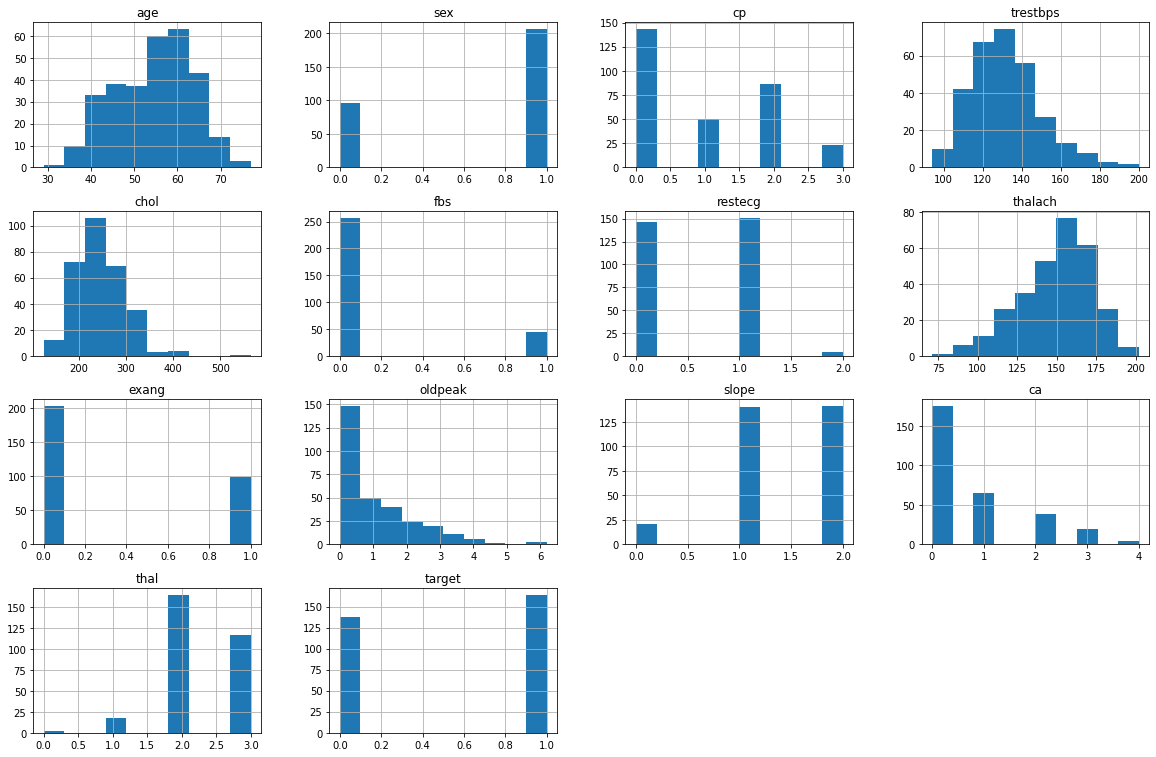

In [ ]:
df.hist(figsize=(20,20), layout=(6,4))

plt.show()

# **Using two methods for correlation calculation ( Pearson's correlation and Spearman's correlation)**

**Pearson's correlation** evaluates the linear relationships between two variables. If the values is close 0, there is a weak or nonexistent linear relationship between the variables.

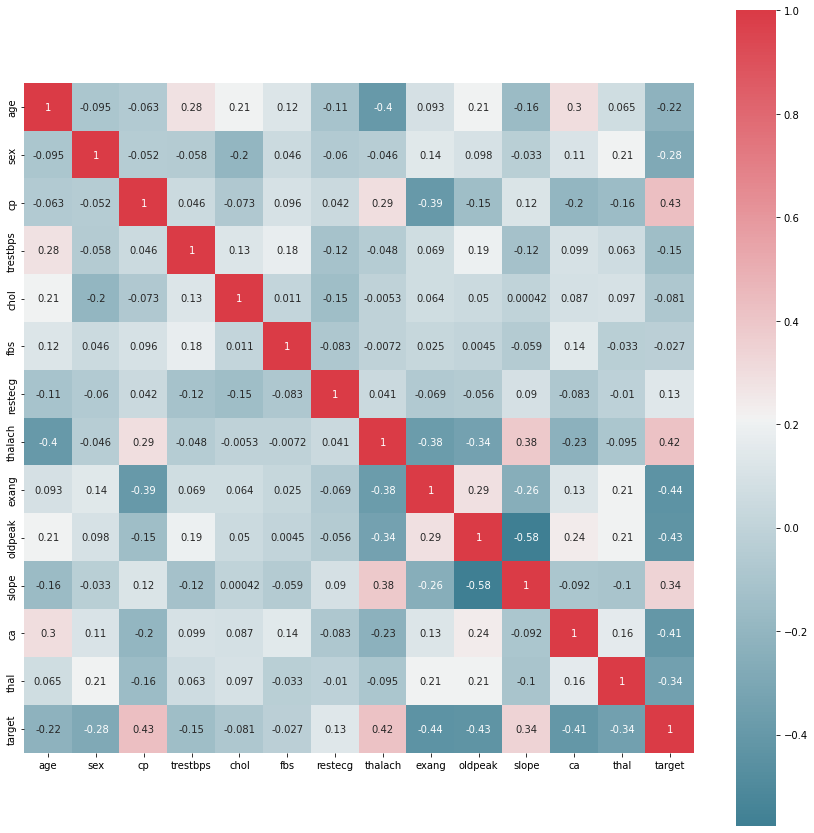

In [ ]:
corr = df.corr(method = "pearson")

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

**Spearman's correlation** evaluates the monotonic relationships between two variables. If the value is close to 0, there is a weak or nonexistent monotonic realtionship between the variables.

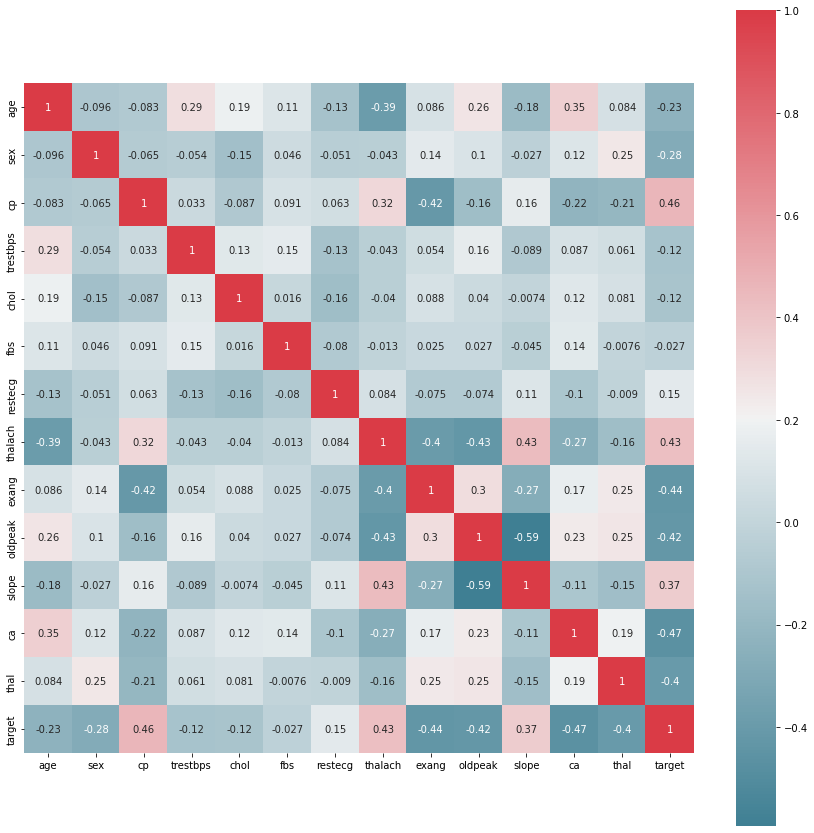

In [ ]:
corr = df.corr(method = "spearman")

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

# **Asking some questions**


In [ ]:
#df['sex'].replace(0, 'Female')
#df['sex'].replace(1, 'Male')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**1-  How many men and women are involved in this dataset?**

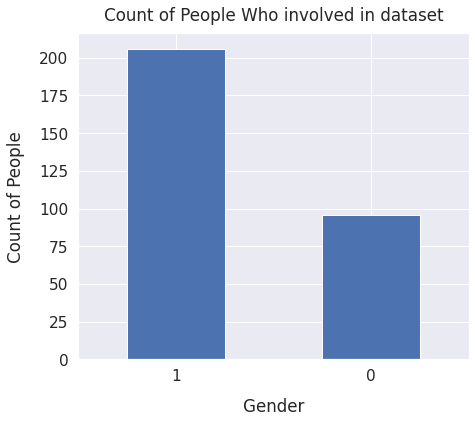

In [ ]:
sns.set(font_scale=1.4)
df['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who involved in dataset", y=1.02);
# 1 means man, 0 means woman.


**2- How many men and how many women have heart disease?**

Text(0.5, 1.02, 'Number of women and men who have heart disease')

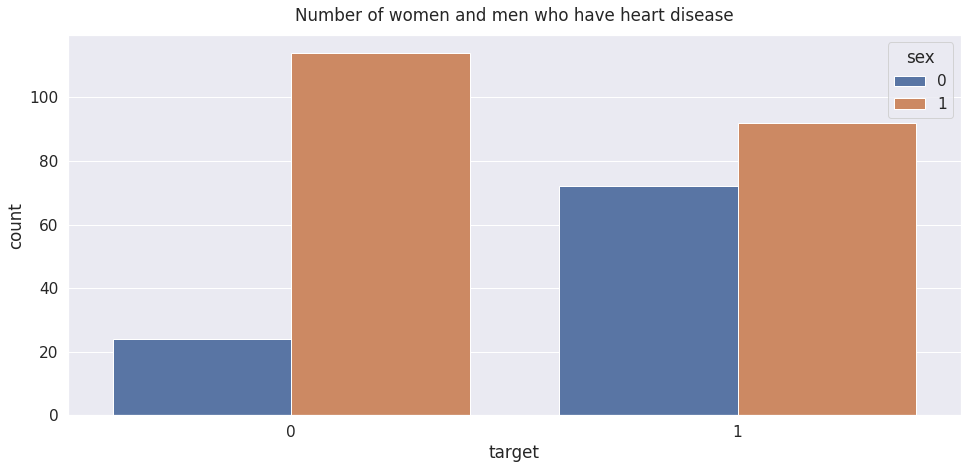

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(data= df, x='target',hue='sex')
plt.title('Number of women and men who have heart disease', y=1.02)

The number of men who have heart disease is more than women.

**3- What type of chest pain do the people with and without heart disease have?**

( Chest pain was classified as typical angina = 0 , atypical angina = 1, nonangina chest pain = 2, and lack of symptoms = 3)

Text(0.5, 1.0, 'Chest Pain Type\n')

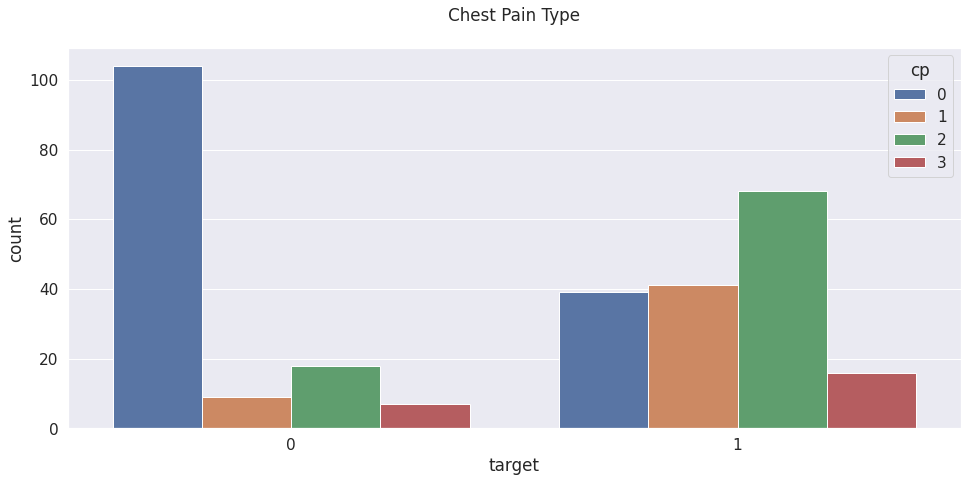

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(data= df, x='target',hue='cp')
plt.title('Chest Pain Type\n')

People with heart disease have nonanginal chest pain.

**4- How many people with Cholostrole more than 200mg/dl have heart disease?**

In [ ]:
df_dis= df[df['target']== 1]
df_chol= df_dis[df_dis['chol']>200]
order=df_chol.target.sum()
print( order ,"people with Cholostrole more than 200mg/dl, have heart disease.")

135 people with Cholostrole more than 200mg/dl, have heart disease.


**5- How many people with blood pressure above 120/80 mm Hg have heart disease?**

In [ ]:
df_dis= df[df['target']== 1]
df_chol= df_dis[df_dis['trestbps']>120]
order=df_chol.target.sum()
print( order ,"people with blood pressure above 120/80 mm Hg, have heart disease.")

104 people with blood pressure above 120/80 mm Hg, have heart disease.


**6- How many people with a fasting blood sugar level ,more than 100 mg/dL (5.6 mmol/L), have heart disease?**

In [ ]:
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

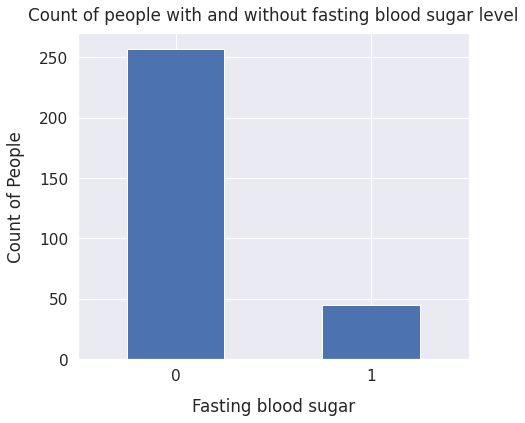

In [ ]:
sns.set(font_scale=1.4)
df['fbs'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Fasting blood sugar", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of people with and without fasting blood sugar level", y=1.02);

**45** people have fasting blood sugar more than normal level and **257** people have normal fasting blood sugar. The normal fasting blood sugar is less than 100 mg/dL.

Text(0.5, 1.0, 'Slope v/s Target\n')

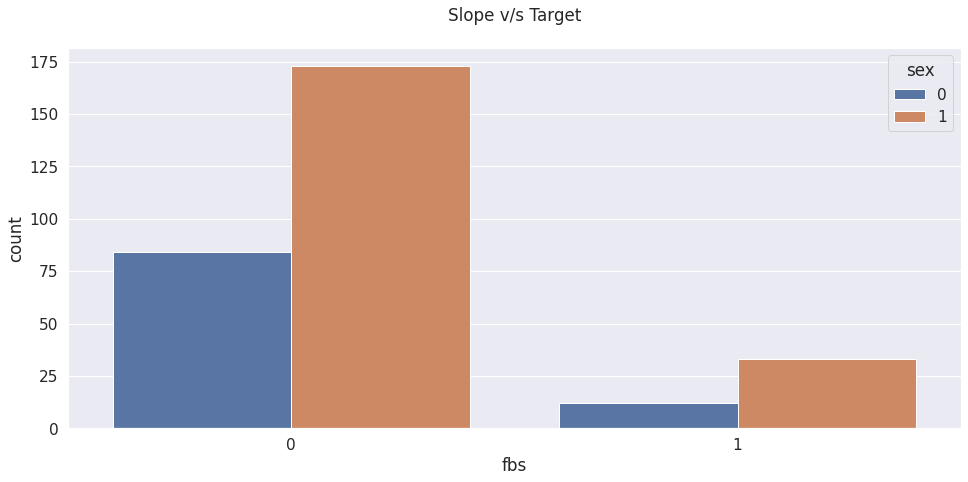

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(data= df, x='fbs',hue='sex')
plt.title('Slope v/s Target\n')

In [ ]:
df_dis= df[df['target']== 1]
df_chol= df_dis[df_dis['fbs'] == 1]
order=df_chol.target.sum()
print( order ,"people with a fasting blood sugar level more than 100 mg/dL, have heart disease.")

23 people with a fasting blood sugar level more than 100 mg/dL, have heart disease.


#**Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

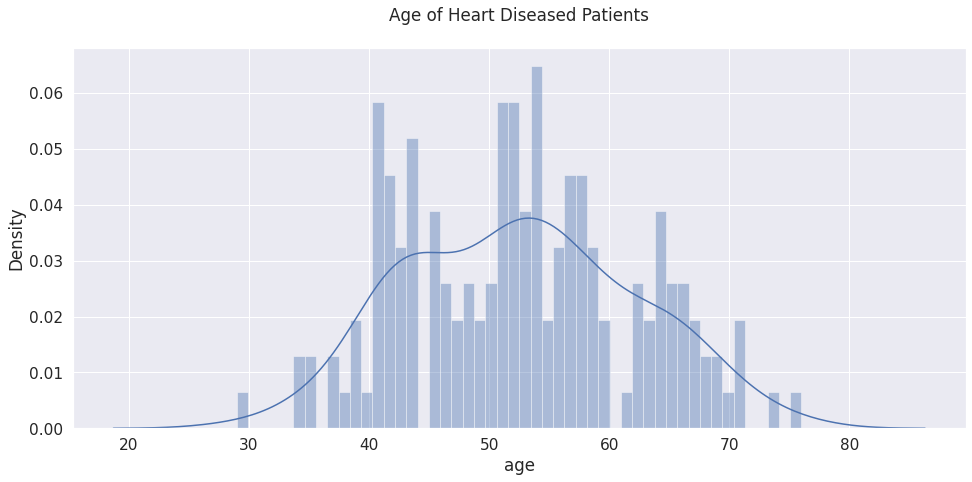

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['age'],bins=50)
plt.title('Age of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol  of Heart Diseased Patients\n')

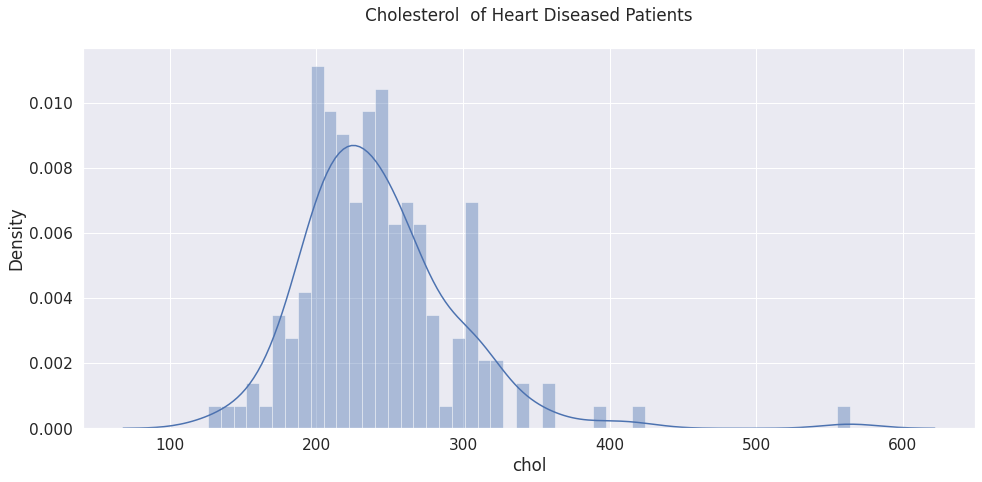

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['chol'],bins=50)
plt.title('Cholesterol  of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, ' Resting blood pressure  of Heart Diseased Patients\n')

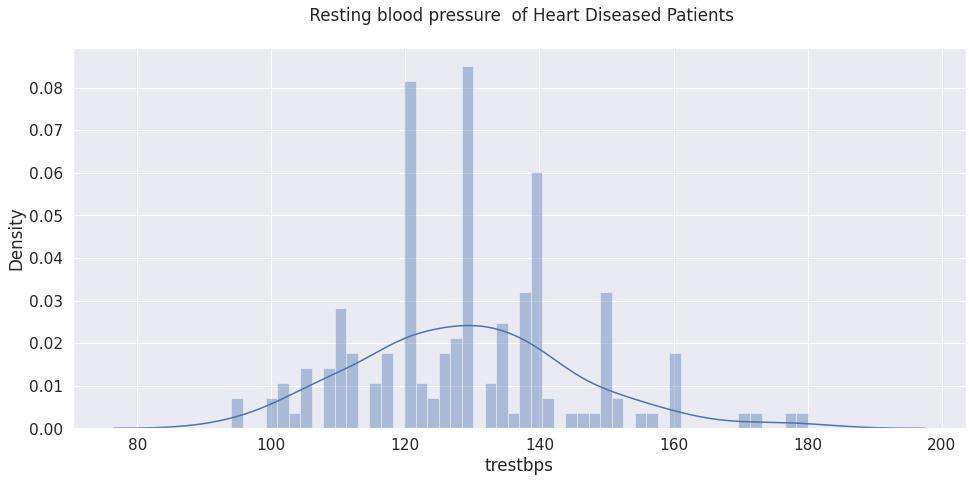

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==1]['trestbps'],bins=50)
plt.title(' Resting blood pressure  of Heart Diseased Patients\n')

Cholesterol vs trestbps(Heart Diseased Patinets)


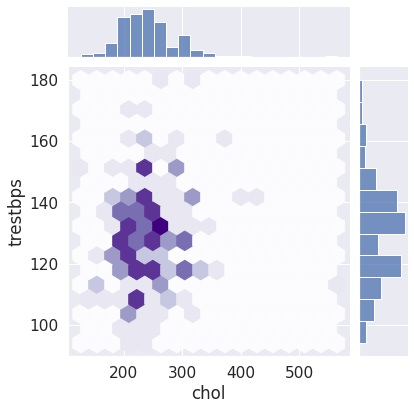

In [ ]:
df_new = df[df['target'] == 1 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
pal = sns.light_palette("red", as_cmap=True)


print('Cholesterol vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df_new,
              x='chol',
              y='trestbps',
              kind='hex',
              cmap='Purples'

              )

# **Hierarchical Clustering**

Because the scale of the variables are not the same, we have to normalize the data so that the scale of each variables will be the same. Otherwise, the model might become biased toward the variables with a higher magnitude.

In [ ]:
#col= ['sex',	'cp',	'trestbps',	'chol','fbs',	'restecg',	'thalach']
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.197453,0.003134,0.009403,0.454455,0.730263,0.003134,0.000000,0.470126,0.000000,0.007209,0.000000,0.0,0.003134,0.003134
1,0.108748,0.002939,0.005878,0.382087,0.734782,0.000000,0.002939,0.549617,0.000000,0.010287,0.000000,0.0,0.005878,0.002939
2,0.136824,0.000000,0.003337,0.433833,0.680784,0.000000,0.000000,0.573994,0.000000,0.004672,0.006674,0.0,0.006674,0.003337
3,0.172879,0.003087,0.003087,0.370454,0.728559,0.000000,0.003087,0.549507,0.000000,0.002470,0.006174,0.0,0.006174,0.003087
4,0.138431,0.000000,0.000000,0.291433,0.859726,0.000000,0.002429,0.395863,0.002429,0.001457,0.004857,0.0,0.004857,0.002429


**Using the dendrogram to find the optimal number of clusters**

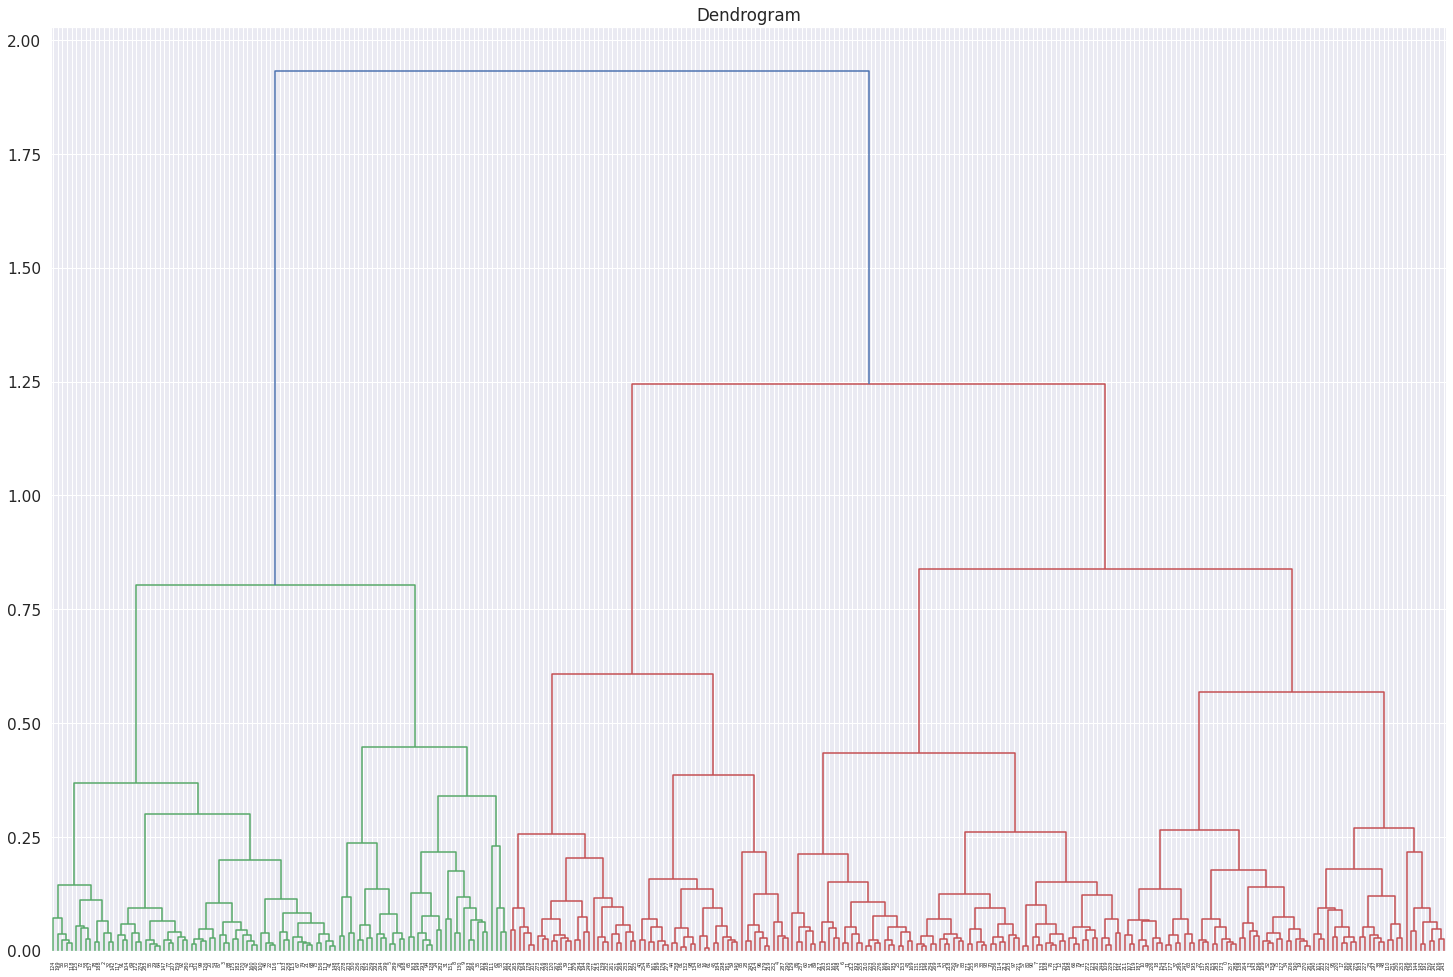

In [ ]:
plt.figure(figsize=(25,17))
plt.title("Dendrogram")
plt.xticks(rotation=90)
dend = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))

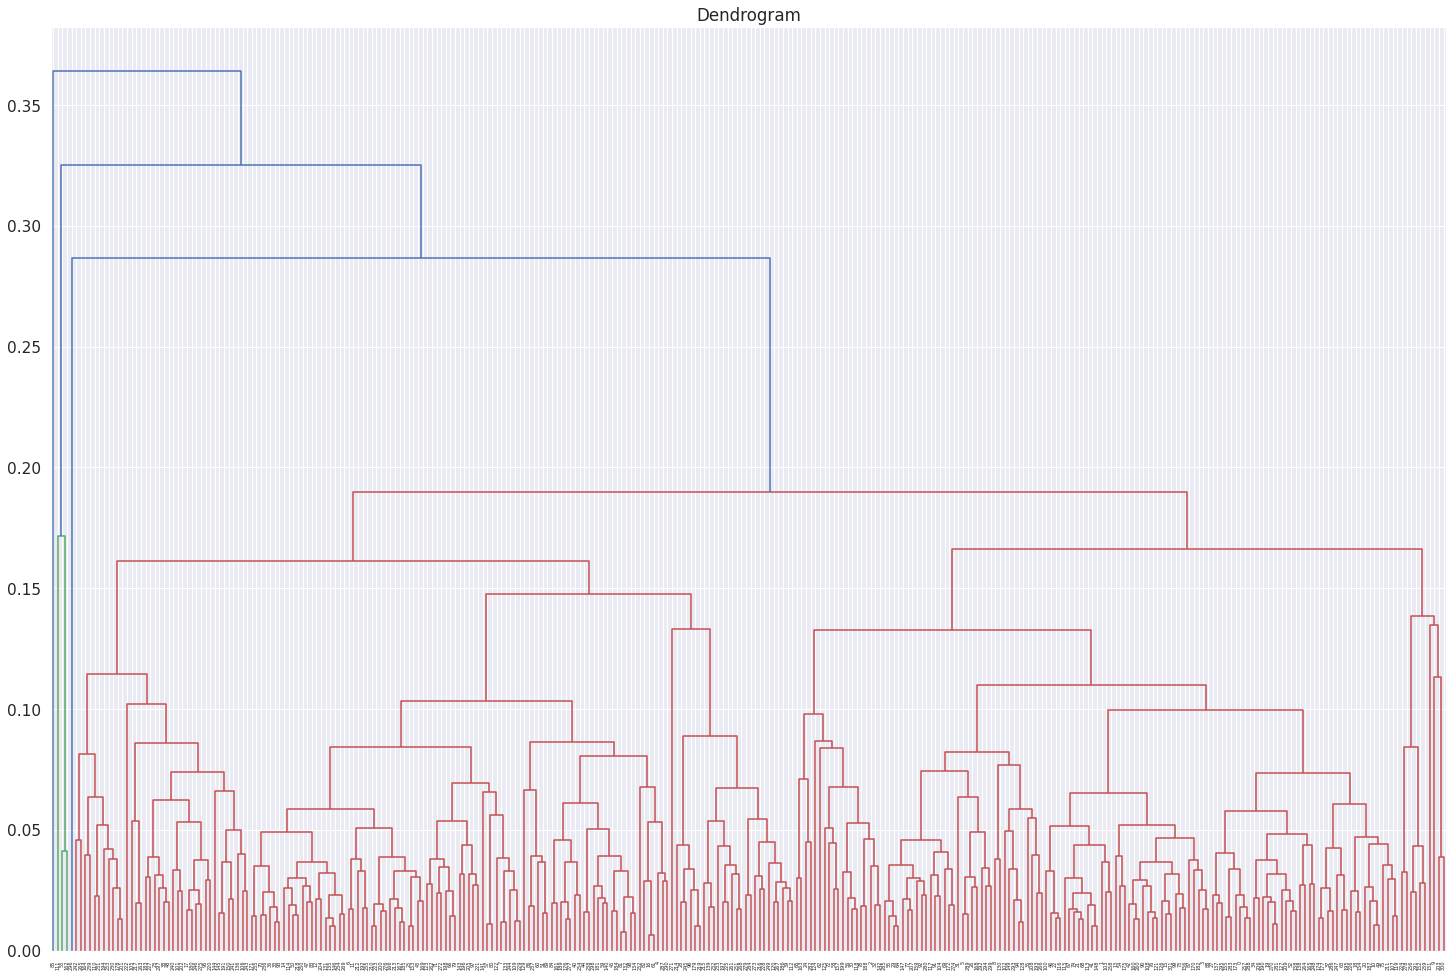

In [ ]:
plt.figure(figsize=(25,17))
plt.title("Dendrogram")
plt.xticks(rotation=90)
dend = sch.dendrogram(sch.linkage(data_scaled, method = 'average'))

 **Nember of clusters**

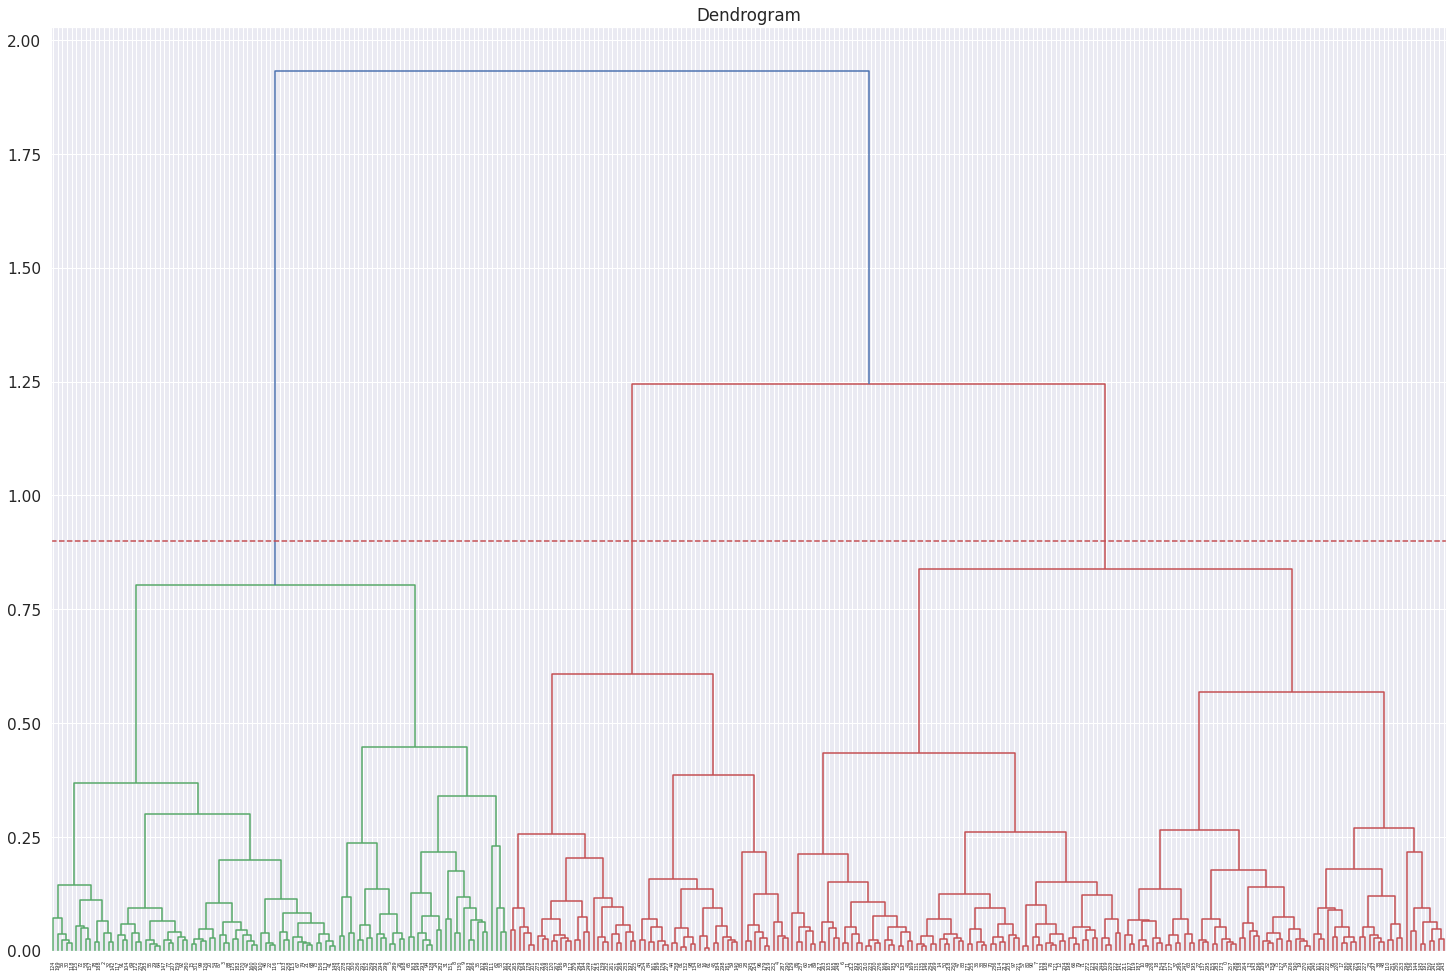

In [ ]:
plt.figure(figsize=(25,17))
plt.title("Dendrogram")
z = sch.linkage(data_scaled, method='ward')
dend = sch.dendrogram(z)
plt.axhline(y=0.90, color='r', linestyle = "--")
plt.show()

**Fitting hierarchical clustring to the dataset**

In [ ]:

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [ ]:
cluster.fit_predict(data_scaled)

array([0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1,

In [ ]:
cluster.labels_

array([0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1,

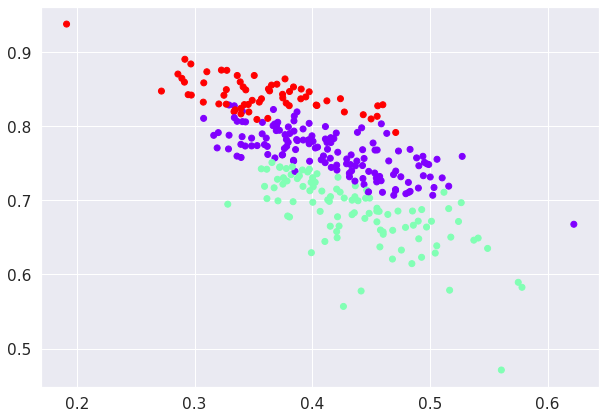

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['trestbps'], data_scaled['chol'], c=cluster.labels_, cmap='rainbow')

# **Supervised Learning**


In [ ]:
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Decision Tree classification**

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.7142857142857143
[[28 10]
 [16 37]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

classifier score on training data:  1.0
classifier score on testing data:  0.7142857142857143
presenting the confusion matrix in a graphical way


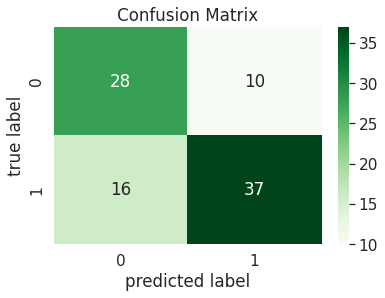

In [ ]:

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
history=clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_dt = clf.predict(X_test)
y_pred_dt_roc = clf.predict_proba(X_test)

# score the model
print("classifier score on training data: ", clf.score(X_train, y_train))
print("classifier score on testing data: ", clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
mat

print('presenting the confusion matrix in a graphical way')
df_cm = pd.DataFrame(mat)
ax=sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greens');
ax.set_title('Confusion Matrix');
ax.set_ylabel('true label');
ax.set_xlabel('predicted label');
ax.set_ylim(df_cm.shape[0], 0);



**Random Forest classification**

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.7582417582417582
[[31 10]
 [12 38]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.79      0.76      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

classifier score on training data:  1.0
classifier score on testing data:  0.7582417582417582
presenting the confusion matrix in a graphical way


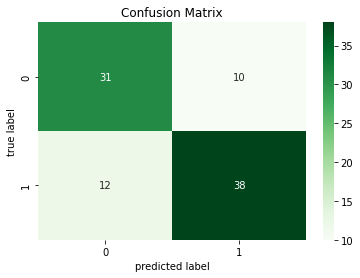

In [ ]:
score_train = []
score_test = []


clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, n_jobs=-1)
history=clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred_dt = clf.predict(X_test)
y_pred_dt_roc = clf.predict_proba(X_test)

# score the model
print("classifier score on training data: ", clf.score(X_train, y_train))
print("classifier score on testing data: ", clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
mat

print('presenting the confusion matrix in a graphical way')
df_cm = pd.DataFrame(mat)
ax=sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greens');
ax.set_title('Confusion Matrix');
ax.set_ylabel('true label');
ax.set_xlabel('predicted label');
ax.set_ylim(df_cm.shape[0], 0);



#**Conclusion**

The Heart Disease UCI, which we analyzed in this notebook, contains information about 302 people ( 206 number male and 96 number female).
The Decision Tree model was predicted with 71.42% accuracy, while the Random Forest obtained the best result with 75.82% accuracy.
The Decision Tree achieved 28 TN and 37 TP, while Random Forest achieved 31 TN and 38 TP.

The detection rate of the Decision Tree shows the models achieved an F1-score of 68% for people with and without heart disease. Random Forest obtained an F1-score of 76%.
 It can be seen that Random Fforest, compared with Decision Tree, was more effective at identifying people with heart disease.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/HeartDisease-Q2.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "HeartDisease-Q2.ipynb"

[NbConvertApp] Converting notebook HeartDisease-Q2.ipynb to PDF
[NbConvertApp] Support files will be in HeartDisease-Q2_files/
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory ./HeartDisease-Q2_files
[NbConvertApp] Making directory .